In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline


from warnings import filterwarnings
filterwarnings('ignore')
import gc
import os

### MODELS
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier


### sklearn utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score, recall_score, confusion_matrix,
                             classification_report, accuracy_score, f1_score)
from sklearn.pipeline import make_pipeline
from sklearn.metrics import multilabel_confusion_matrix

In [35]:
root_dir = "."
evaluation_dir = root_dir + "/evaluation"
df = pd.read_csv(f"{root_dir}/data/preprocessed_data.csv")
df.head()

,"1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?","2- Son bir ay içinde ne sıklıkta, yaşamınızdaki önemli şeyleri kontrol edemediğinizi hissettiniz?","3- Son bir ay içinde kendinizi ne sıklıkta, gergin ve stresli hissettiniz?","4- Son bir ay içinde, yaşamınızdaki can sıkıcı durumlarla ne sıklıkta başarılı bir biçimde baş ettiniz?","5- Son bir ay içinde ne sıklıkta, yaşamınızda meydana gelen önemli değişikliklerle etkili bir biçimde başa çıktığınızı hissettiniz?","6- Son bir ay içinde ne sıklıkta, kişisel sorunlarınızla baş etme yeteneğinizden emin oldunuz?","7- Son bir ay içinde ne sıklıkta, işlerin istediğiniz gibi gittiğini hissettiniz?","8- Son bir ay içinde ne sıklıkta, yapmak zorunda olduğunuz her şeyin üstesinden gelemeyeceğinizi düşündünüz?",9- Son bir ay içinde yaşamınızdaki rahatsız edici olayları ne sıklıkta kontrol edebildiniz?,"10- Son bir ay içinde ne sıklıkta, yaşamınızdaki olaylara hakim olduğunuzu hissettiniz?","11- Son bir ay içinde, kontrolünüz dışında gerçekleşen şeylerden dolayı ne sıklıkta öfkelendiniz?","12- Son bir ay içinde ne sıklıkta, üstesinden gelmek zorunda olduğunuz şeyler üzerinde düşündünüz?",13- Zamanınızı nasıl geçirdiğinizi son bir ay içinde ne sıklıkta kontrol edebildiniz?,"14- Son bir ay içinde ne sıklıkta, güçlüklerin, üstesinden gelemeyeceğiniz kadar çoğaldığını hissettiniz?",score,factor_1_score,factor_2_score,stress,factor_1,factor_2
0,2,2,3,3,3,2,2,1,2,2,1,4,3,2,26,10,16,0,0,1
1,1,2,2,3,3,3,2,1,2,3,1,4,3,2,22,8,14,0,0,1
2,1,2,3,4,4,3,2,0,3,3,0,4,3,1,17,4,13,0,0,0
3,0,3,3,2,2,1,1,3,2,2,3,4,3,3,34,15,19,1,1,1
4,1,1,1,3,0,1,1,3,3,2,0,2,2,2,26,16,10,0,1,0


In [36]:
X = df.iloc[:, :14]
X.head()

,"1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?","2- Son bir ay içinde ne sıklıkta, yaşamınızdaki önemli şeyleri kontrol edemediğinizi hissettiniz?","3- Son bir ay içinde kendinizi ne sıklıkta, gergin ve stresli hissettiniz?","4- Son bir ay içinde, yaşamınızdaki can sıkıcı durumlarla ne sıklıkta başarılı bir biçimde baş ettiniz?","5- Son bir ay içinde ne sıklıkta, yaşamınızda meydana gelen önemli değişikliklerle etkili bir biçimde başa çıktığınızı hissettiniz?","6- Son bir ay içinde ne sıklıkta, kişisel sorunlarınızla baş etme yeteneğinizden emin oldunuz?","7- Son bir ay içinde ne sıklıkta, işlerin istediğiniz gibi gittiğini hissettiniz?","8- Son bir ay içinde ne sıklıkta, yapmak zorunda olduğunuz her şeyin üstesinden gelemeyeceğinizi düşündünüz?",9- Son bir ay içinde yaşamınızdaki rahatsız edici olayları ne sıklıkta kontrol edebildiniz?,"10- Son bir ay içinde ne sıklıkta, yaşamınızdaki olaylara hakim olduğunuzu hissettiniz?","11- Son bir ay içinde, kontrolünüz dışında gerçekleşen şeylerden dolayı ne sıklıkta öfkelendiniz?","12- Son bir ay içinde ne sıklıkta, üstesinden gelmek zorunda olduğunuz şeyler üzerinde düşündünüz?",13- Zamanınızı nasıl geçirdiğinizi son bir ay içinde ne sıklıkta kontrol edebildiniz?,"14- Son bir ay içinde ne sıklıkta, güçlüklerin, üstesinden gelemeyeceğiniz kadar çoğaldığını hissettiniz?"
0,2,2,3,3,3,2,2,1,2,2,1,4,3,2
1,1,2,2,3,3,3,2,1,2,3,1,4,3,2
2,1,2,3,4,4,3,2,0,3,3,0,4,3,1
3,0,3,3,2,2,1,1,3,2,2,3,4,3,3
4,1,1,1,3,0,1,1,3,3,2,0,2,2,2


In [37]:
y = df.iloc[:, 17:]
y.head()

,stress,factor_1,factor_2
0,0,0,1
1,0,0,1
2,0,0,0
3,1,1,1
4,0,1,0


In [38]:
# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# create XGBoost instance with default hyper-parameters
xgb_estimator = XGBClassifier(objective='binary:logistic')

# create MultiOutputClassifier instance with XGBoost model inside
multilabel_model = MultiOutputClassifier(xgb_estimator)

# fit the model
multilabel_model.fit(X_train, y_train)

# get the feature importance table
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': multilabel_model.estimators_[0].feature_importances_})
#importance_df = importance_df.sort_values(by='Importance', ascending=False)
pd.set_option('display.max_colwidth', None)
importance_df

[00:10:49] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:10:49] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:10:49] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set

,Feature,Importance
0,"1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?",0.019528
1,"2- Son bir ay içinde ne sıklıkta, yaşamınızdaki önemli şeyleri kontrol edemediğinizi hissettiniz?",0.162475
2,"3- Son bir ay içinde kendinizi ne sıklıkta, gergin ve stresli hissettiniz?",0.120708
3,"4- Son bir ay içinde, yaşamınızdaki can sıkıcı durumlarla ne sıklıkta başarılı bir biçimde baş ettiniz?",0.066695
4,"5- Son bir ay içinde ne sıklıkta, yaşamınızda meydana gelen önemli değişikliklerle etkili bir biçimde başa çıktığınızı hissettiniz?",0.016185
5,"6- Son bir ay içinde ne sıklıkta, kişisel sorunlarınızla baş etme yeteneğinizden emin oldunuz?",0.025950
6,"7- Son bir ay içinde ne sıklıkta, işlerin istediğiniz gibi gittiğini hissettiniz?",0.044475
7,"8- Son bir ay içinde ne sıklıkta, yapmak zorunda olduğunuz her şeyin üstesinden gelemeyeceğinizi düşündünüz?",0.097370
8,9- Son bir ay içinde yaşamınızdaki rahatsız edici olayları ne sıklıkta kontrol edebildiniz?,0.110325
9,"10- Son bir ay içinde ne sıklıkta, yaşamınızdaki olaylara hakim olduğunuzu hissettiniz?",0.160176


In [39]:
# make predictions on test data
y_pred = multilabel_model.predict(X_test)

# calculate f1
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: {:.4f}".format(f1))

# calculate recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall: {:.4f}".format(recall))

# calculate precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: {:.4f}".format(precision))

F1 Score: 0.9092
Recall: 0.8722
Precision: 0.9514


In [40]:
y_test

,stress,factor_1,factor_2
54,1,1,1
112,1,1,1
130,0,0,1
65,1,0,1
74,0,0,0
21,1,1,1
29,0,0,0
148,0,0,0
37,1,1,1
19,0,1,0


In [41]:
y_predicted = multilabel_model.predict(X_test)
y_predicted

array([[1, 1, 1],
       [1, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 1, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1]])

In [42]:
#data distribution for training-test split
print("stress distribution in training set")
print(y_train.iloc[:,0].value_counts())
print("stress distribution in test set")
print(y_test.iloc[:,0].value_counts())

print("\n")
#data distribution for training-test split
print("factor I distribution in training set")
print(y_train.iloc[:,1].value_counts())
print("factor I distribution in test set")
print(y_test.iloc[:,1].value_counts())

print("\n")
#data distribution for training-test split
print("factor II distribution in training set")
print(y_train.iloc[:,2].value_counts())
print("factor II distribution in test set")
print(y_test.iloc[:,2].value_counts())


stress distribution in training set
0    61
1    59
Name: stress, dtype: int64
stress distribution in test set
1    15
0    15
Name: stress, dtype: int64


factor I distribution in training set
0    71
1    49
Name: factor_1, dtype: int64
factor I distribution in test set
0    18
1    12
Name: factor_1, dtype: int64


factor II distribution in training set
1    72
0    48
Name: factor_2, dtype: int64
factor II distribution in test set
1    18
0    12
Name: factor_2, dtype: int64


# Serious Stuff Coming After Here

In [43]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=90, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label', fontsize=13)
    axes.set_xlabel('Predicted label', fontsize=13)
    axes.set_title("Class - " + class_label)

In [44]:
def print_results(y_test, y_pred, model, path):
    print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
    print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
    print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
    print('\n')
    print(classification_report(y_test, y_pred))
    print('\n')

    labels = y.columns

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
        
    for axes, cfs_matrix, label in zip(ax.flatten(), multilabel_confusion_matrix(y_test, y_pred), labels):
        print_confusion_matrix(cfs_matrix, axes, label, ["No Stress", "Stressed"])

    fig.tight_layout()

    img_path = os.path.join(path, model.name + '_matrix.png') 
    pdf_path = os.path.join(path, model.name + '_matrix.pdf') 
    
    plt.savefig(img_path, bbox_inches="tight",
                pad_inches=0.1, transparent=False, dpi=300)
    plt.savefig(pdf_path, bbox_inches="tight",
                pad_inches=0.1, transparent=False, dpi=300)
    plt.show()

In [45]:
# create XGBoost instance with default hyper-parameters
xgb_estimator = XGBClassifier(objective='binary:logistic', random_state=42)
rf_estimator = RandomForestClassifier(random_state=42)
dt_estimator = DecisionTreeClassifier(random_state=42)
gbc_estimator = GradientBoostingClassifier(random_state=42)
cb_estimator = CatBoostClassifier(verbose = False, random_state=42)
ada_estimator = AdaBoostClassifier(random_state=42)
        
xgb_estimator.name = 'XGBoost'
rf_estimator.name = 'Random Forest'
dt_estimator.name = 'Decision Tree'
gbc_estimator.name = 'Gradient Boosting'
cb_estimator.name = 'CatBoost'
ada_estimator.name = 'AdaBoost'

models = [xgb_estimator, rf_estimator, dt_estimator, gbc_estimator, cb_estimator, ada_estimator]
random_states = [1,42,123,1234,12345]

In [46]:
# Note: This is a helper function to obtain the results of a trained model.
#      It splits the data into train and test sets, trains the model, and prints the results.

def exec_model(model, path, state, scale):
    
    # split dataset into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=state)

    ##################################################################################
    # Train models, we'll loop over different random states
    # and we don't want to overwrite to same model, we want to create a new model with new random state.
    #     
    # Hence, by using my approach, we can be sure that for each random_state,
    # we create same distribution of train and test sets, and we train the same model.
    # IT IS CRUCIAL THAT YOU SEE THE SAME RESULTS WHEN YOU RUN THE SAME MODEL.
    ##################################################################################

                
    # create MultiOutputClassifier instance with model inside
    multilabel_model = MultiOutputClassifier(model)

    # fit the model
    multilabel_model.fit(X_train, y_train)

    
    if scale == True:
        pipe = make_pipeline(StandardScaler(), multilabel_model)
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
    else:
        y_pred = multilabel_model.predict(X_test)
    
    scores = []
    scores.append(precision_score(y_test, y_pred, average='macro'))
    scores.append(recall_score(y_test, y_pred, average='macro'))
    scores.append(f1_score(y_test, y_pred, average='macro'))

    
    ################## CREATE FILE PATH IF NOT EXIST #######################
    state_dir = os.path.join(path, "random_state-" + f"{state}")
    matrices_path = os.path.join(state_dir, "confusion_matrices")

    try:
        os.mkdir(path) 
    except OSError as error: 
        pass

    try:
        os.mkdir(state_dir) 
    except OSError as error: 
        pass
        
    try:
        os.mkdir(matrices_path) 
    except OSError as error: 
        pass

    ######################################################################
    # PRINT RESULTS
    print_results(y_test, y_pred, model, matrices_path)

    importance = np.zeros(X_train.columns.size,)
    importance = np.array(multilabel_model.estimators_[0].feature_importances_)
    importance = np.reshape(importance, (1, X_train.columns.size))
    importance_df = pd.DataFrame(data=importance, columns=X_train.columns)

    return importance_df, scores




*********************************************************************************
-------------- XGBoost --------------

[00:11:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:11:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:11:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the

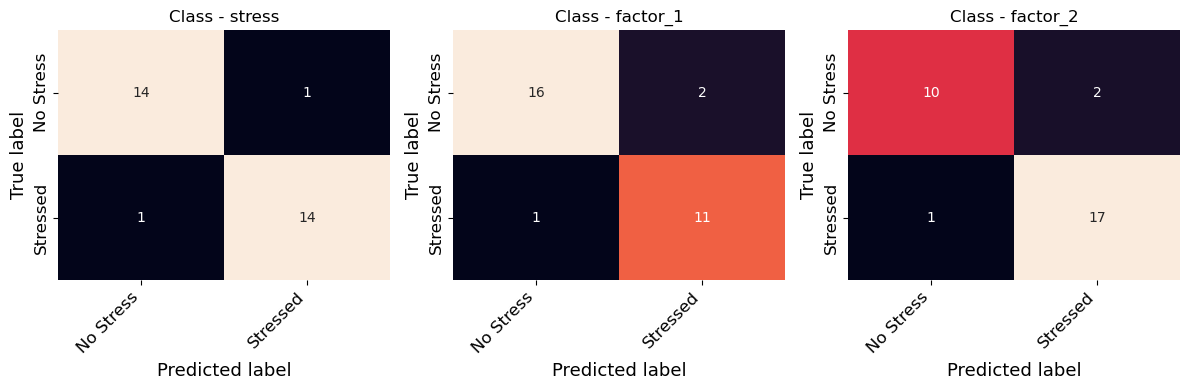


*********************************************************************************
-------------- Random Forest --------------

Precision: 0.9144
Recall: 0.9352
F1 Score: 0.9244


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.92      0.92      0.92        12
           2       0.89      0.89      0.89        18

   micro avg       0.91      0.93      0.92        45
   macro avg       0.91      0.94      0.92        45
weighted avg       0.91      0.93      0.92        45
 samples avg       0.54      0.57      0.55        45





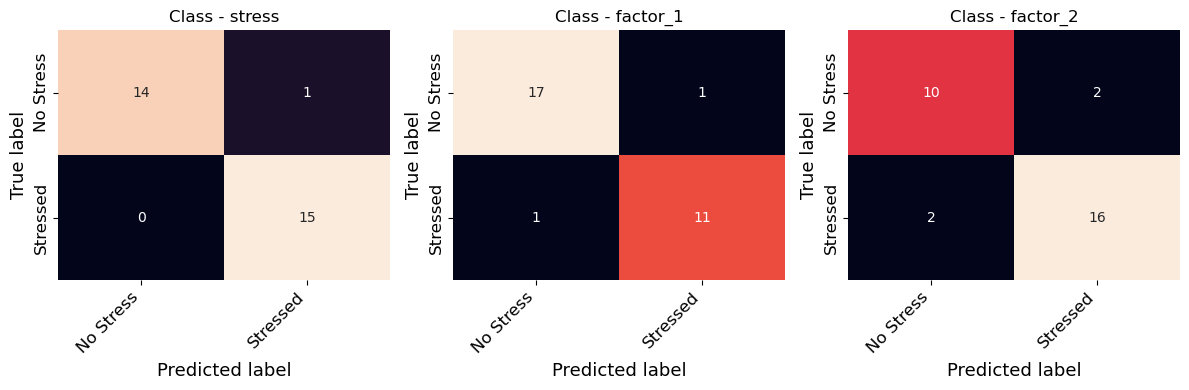


*********************************************************************************
-------------- Decision Tree --------------

Precision: 0.8808
Recall: 0.8852
F1 Score: 0.8817


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.91      0.83      0.87        12
           2       0.80      0.89      0.84        18

   micro avg       0.87      0.89      0.88        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.87      0.89      0.88        45
 samples avg       0.53      0.53      0.53        45





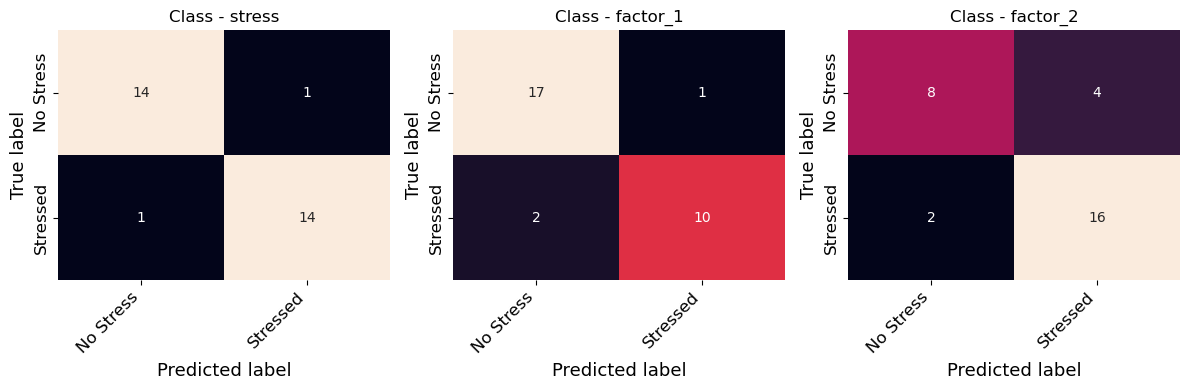


*********************************************************************************
-------------- Gradient Boosting --------------

Precision: 0.8908
Recall: 0.9352
F1 Score: 0.9122


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.85      0.92      0.88        12
           2       0.89      0.89      0.89        18

   micro avg       0.89      0.93      0.91        45
   macro avg       0.89      0.94      0.91        45
weighted avg       0.89      0.93      0.91        45
 samples avg       0.53      0.57      0.55        45





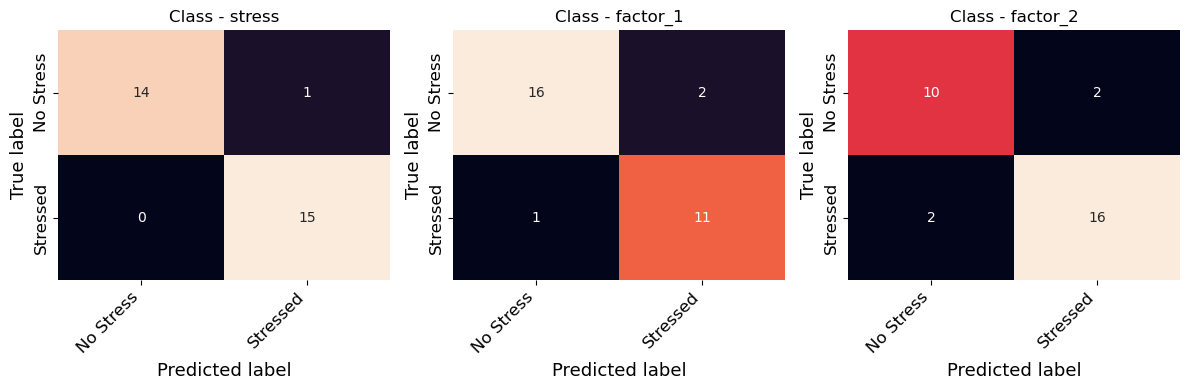


*********************************************************************************
-------------- CatBoost --------------

Precision: 0.9069
Recall: 0.9130
F1 Score: 0.9092


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.85      0.92      0.88        12
           2       0.94      0.89      0.91        18

   micro avg       0.91      0.91      0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45
 samples avg       0.53      0.55      0.54        45





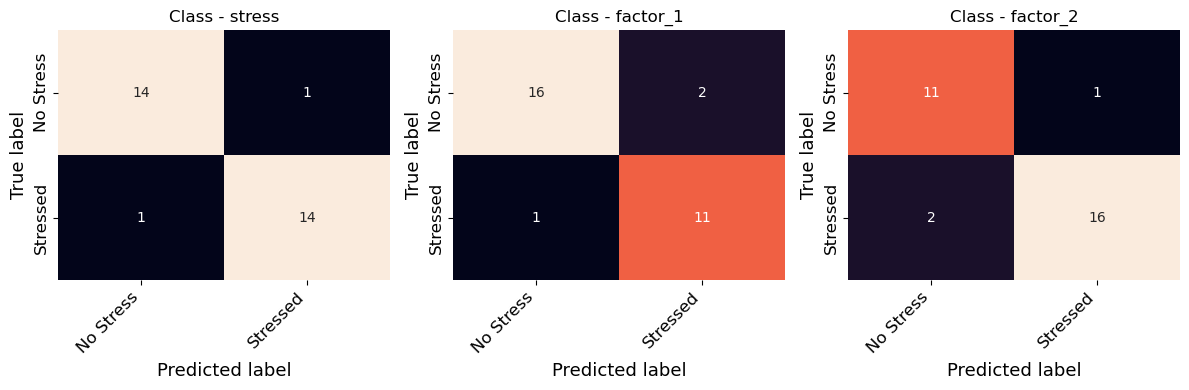


*********************************************************************************
-------------- AdaBoost --------------

Precision: 0.8764
Recall: 0.9593
F1 Score: 0.9144


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.92      1.00      0.96        12
           2       0.77      0.94      0.85        18

   micro avg       0.86      0.96      0.91        45
   macro avg       0.88      0.96      0.91        45
weighted avg       0.87      0.96      0.91        45
 samples avg       0.59      0.62      0.60        45





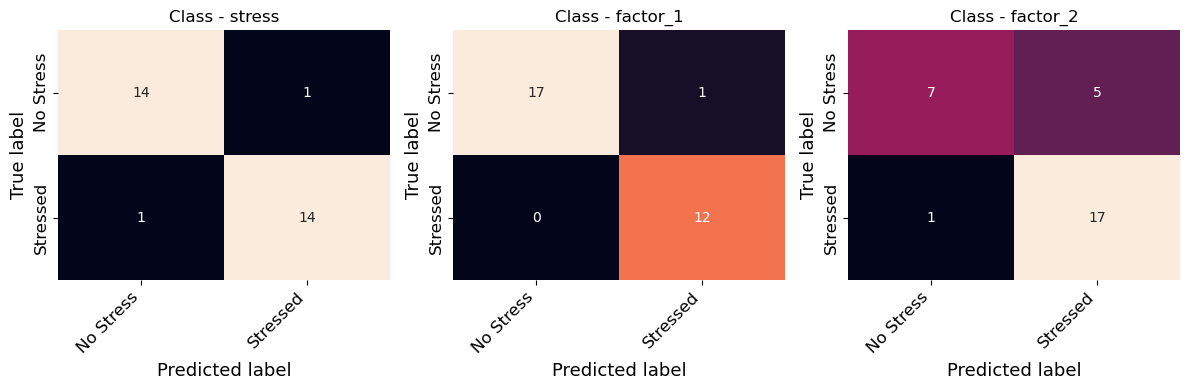

  Models  Precision    Recall  F1_Score  \
0    XGB   0.891408  0.931481  0.910751   
1     RF   0.914352  0.935185  0.924432   
2     DT   0.880808  0.885185  0.881668   
3     GB   0.890848  0.935185  0.912210   
4     CB   0.906888  0.912963  0.909206   
5    ADA   0.876379  0.959259  0.914444   

   1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?  \
0                                                                                            0.025837   
1                                                                                            0.068363   
2                                                                                            0.030987   
3                                                                                            0.024655   
4                                                                                            9.207983   
5                                                                   

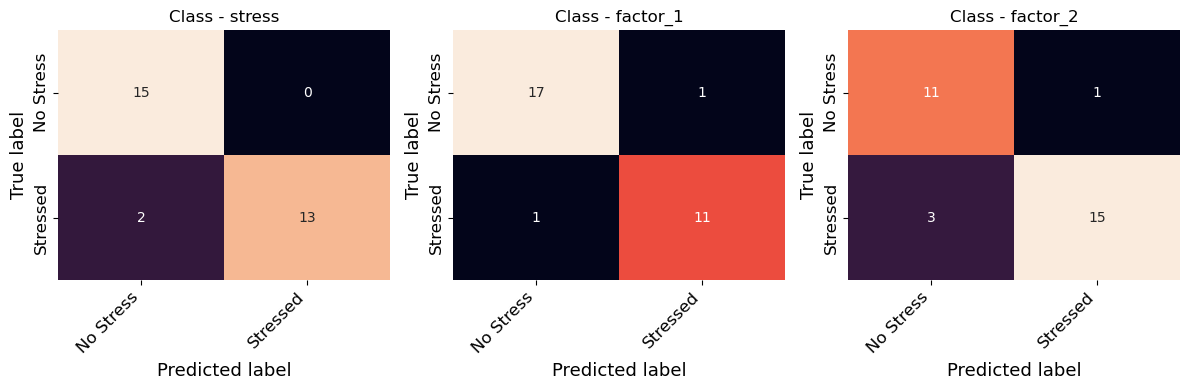


*********************************************************************************
-------------- Random Forest --------------

Precision: 0.9236
Recall: 0.8667
F1 Score: 0.8937


              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.83      0.83      0.83        12
           2       0.94      0.83      0.88        18

   micro avg       0.93      0.87      0.90        45
   macro avg       0.92      0.87      0.89        45
weighted avg       0.93      0.87      0.90        45
 samples avg       0.53      0.53      0.52        45





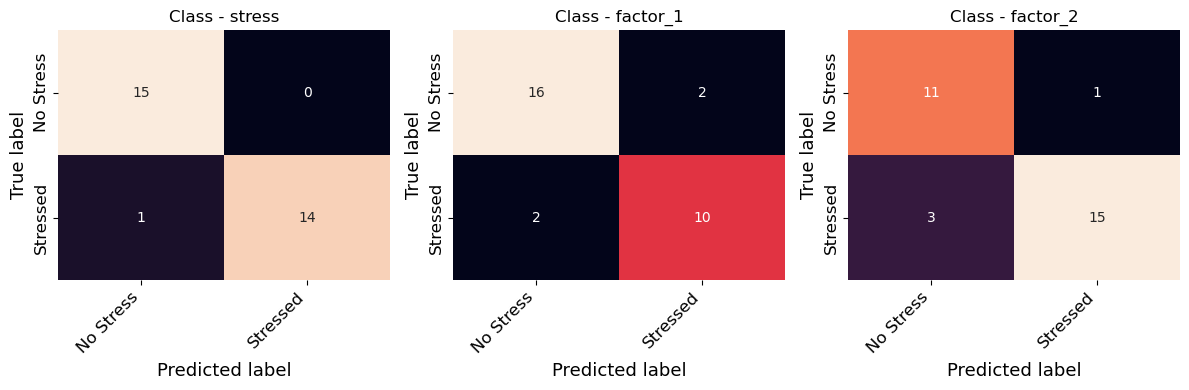


*********************************************************************************
-------------- Decision Tree --------------

Precision: 0.8741
Recall: 0.8907
F1 Score: 0.8774


              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.73      0.92      0.81        12
           2       0.89      0.89      0.89        18

   micro avg       0.87      0.89      0.88        45
   macro avg       0.87      0.89      0.88        45
weighted avg       0.88      0.89      0.88        45
 samples avg       0.59      0.58      0.57        45





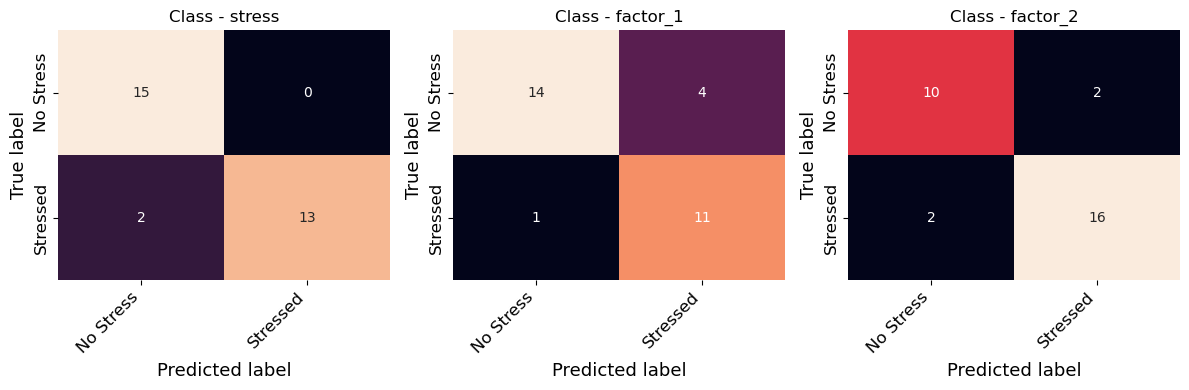


*********************************************************************************
-------------- Gradient Boosting --------------

Precision: 0.8984
Recall: 0.8259
F1 Score: 0.8595


              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.83      0.83      0.83        12
           2       0.93      0.78      0.85        18

   micro avg       0.90      0.82      0.86        45
   macro avg       0.90      0.83      0.86        45
weighted avg       0.91      0.82      0.86        45
 samples avg       0.51      0.49      0.49        45





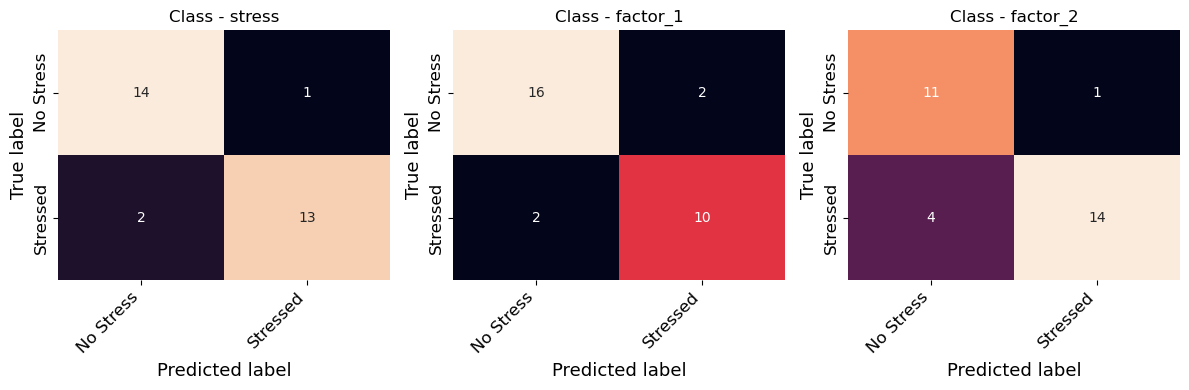


*********************************************************************************
-------------- CatBoost --------------

Precision: 0.8998
Recall: 0.8444
F1 Score: 0.8707


              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.83      0.83      0.83        12
           2       0.94      0.83      0.88        18

   micro avg       0.90      0.84      0.87        45
   macro avg       0.90      0.84      0.87        45
weighted avg       0.91      0.84      0.87        45
 samples avg       0.51      0.51      0.50        45





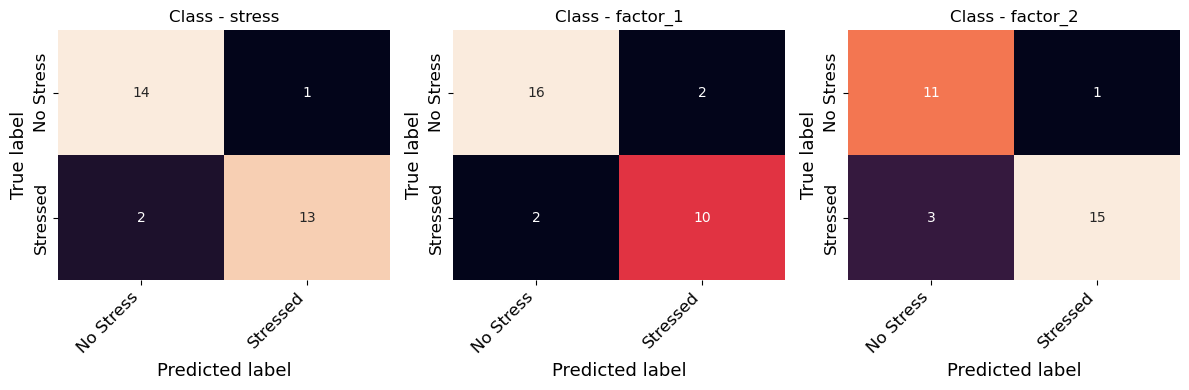


*********************************************************************************
-------------- AdaBoost --------------

Precision: 0.9514
Recall: 0.8944
F1 Score: 0.9215


              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.92      0.92      0.92        12
           2       0.94      0.83      0.88        18

   micro avg       0.95      0.89      0.92        45
   macro avg       0.95      0.89      0.92        45
weighted avg       0.95      0.89      0.92        45
 samples avg       0.55      0.54      0.54        45





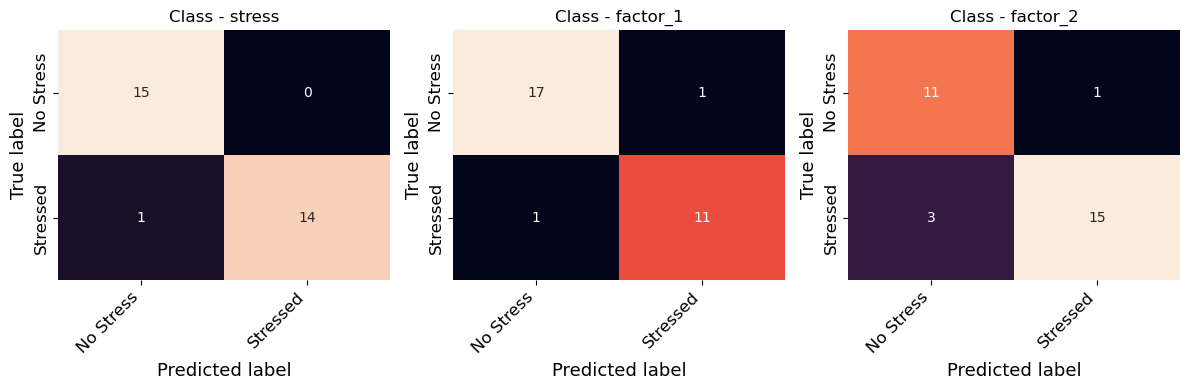

  Models  Precision    Recall  F1_Score  \
0    XGB   0.951389  0.872222  0.909197   
1     RF   0.923611  0.866667  0.893735   
2     DT   0.874074  0.890741  0.877425   
3     GB   0.898413  0.825926  0.859457   
4     CB   0.899802  0.844444  0.870746   
5    ADA   0.951389  0.894444  0.921512   

   1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?  \
0                                                                                            0.019528   
1                                                                                            0.075979   
2                                                                                            0.010434   
3                                                                                            0.022165   
4                                                                                            7.034794   
5                                                                   

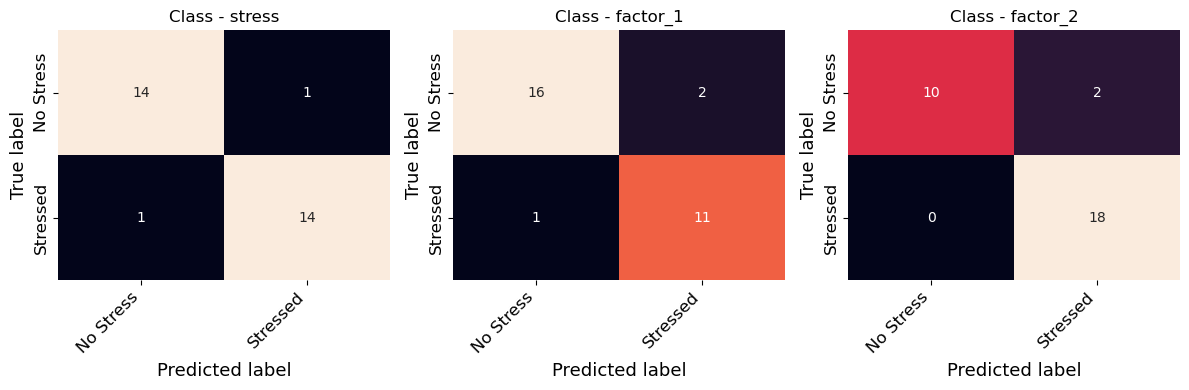


*********************************************************************************
-------------- Random Forest --------------

Precision: 0.9151
Recall: 0.9278
F1 Score: 0.9202


              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.92      0.92      0.92        12
           2       0.90      1.00      0.95        18

   micro avg       0.91      0.93      0.92        45
   macro avg       0.92      0.93      0.92        45
weighted avg       0.91      0.93      0.92        45
 samples avg       0.62      0.62      0.61        45





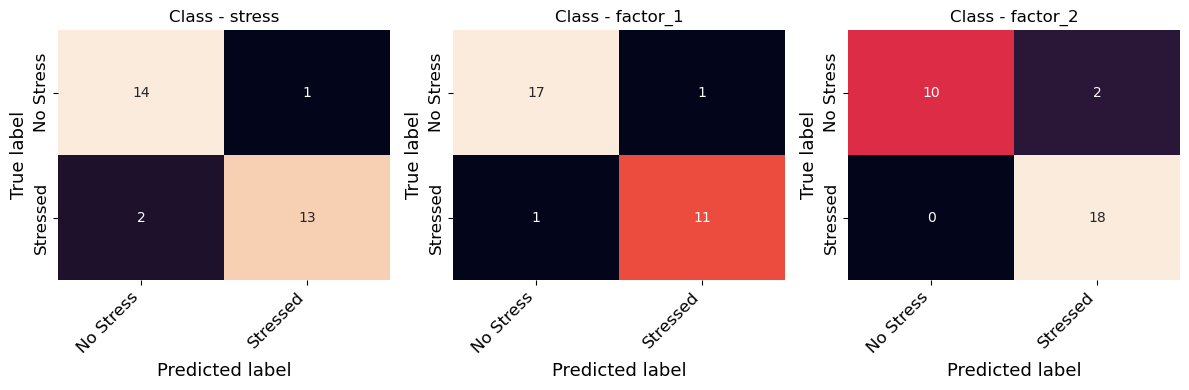


*********************************************************************************
-------------- Decision Tree --------------

Precision: 0.8031
Recall: 0.9370
F1 Score: 0.8629


              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.75      1.00      0.86        12
           2       0.89      0.94      0.92        18

   micro avg       0.81      0.93      0.87        45
   macro avg       0.80      0.94      0.86        45
weighted avg       0.81      0.93      0.87        45
 samples avg       0.56      0.62      0.56        45





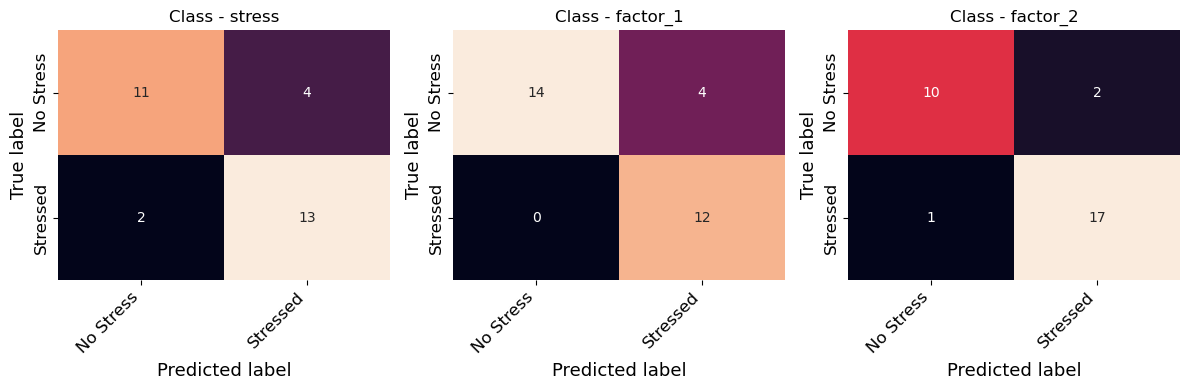


*********************************************************************************
-------------- Gradient Boosting --------------

Precision: 0.8709
Recall: 0.9278
F1 Score: 0.8980


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.85      0.92      0.88        12
           2       0.90      1.00      0.95        18

   micro avg       0.88      0.93      0.90        45
   macro avg       0.87      0.93      0.90        45
weighted avg       0.87      0.93      0.90        45
 samples avg       0.60      0.62      0.59        45





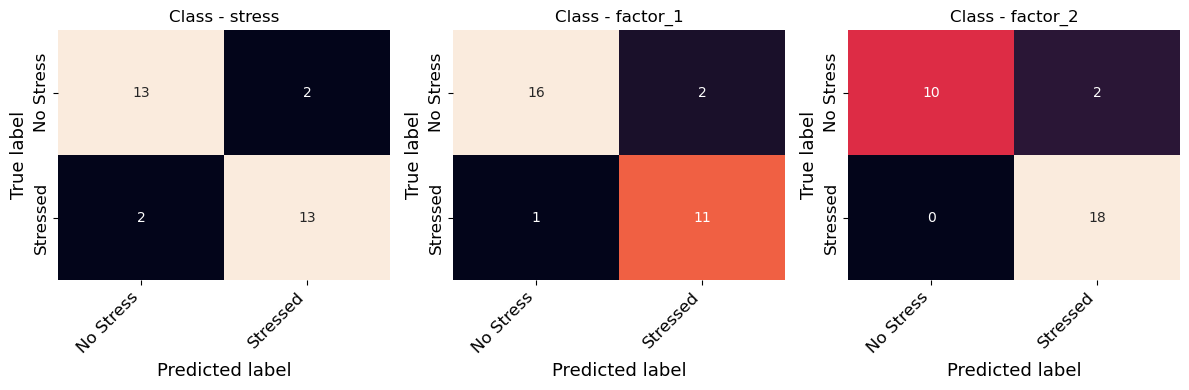


*********************************************************************************
-------------- CatBoost --------------

Precision: 0.8898
Recall: 0.9093
F1 Score: 0.8985


              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.85      0.92      0.88        12
           2       0.89      0.94      0.92        18

   micro avg       0.89      0.91      0.90        45
   macro avg       0.89      0.91      0.90        45
weighted avg       0.89      0.91      0.90        45
 samples avg       0.58      0.58      0.57        45





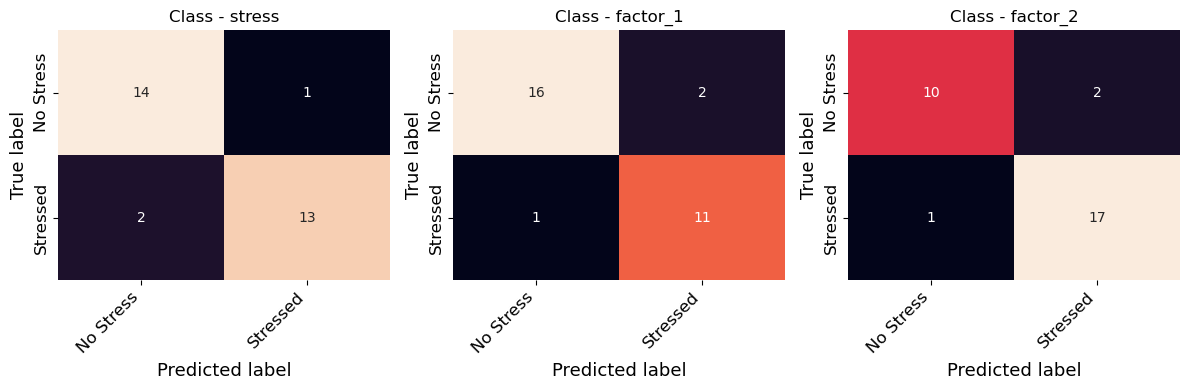


*********************************************************************************
-------------- AdaBoost --------------

Precision: 0.8874
Recall: 0.9130
F1 Score: 0.8992


              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.85      0.92      0.88        12
           2       0.94      0.89      0.91        18

   micro avg       0.89      0.91      0.90        45
   macro avg       0.89      0.91      0.90        45
weighted avg       0.89      0.91      0.90        45
 samples avg       0.53      0.58      0.55        45





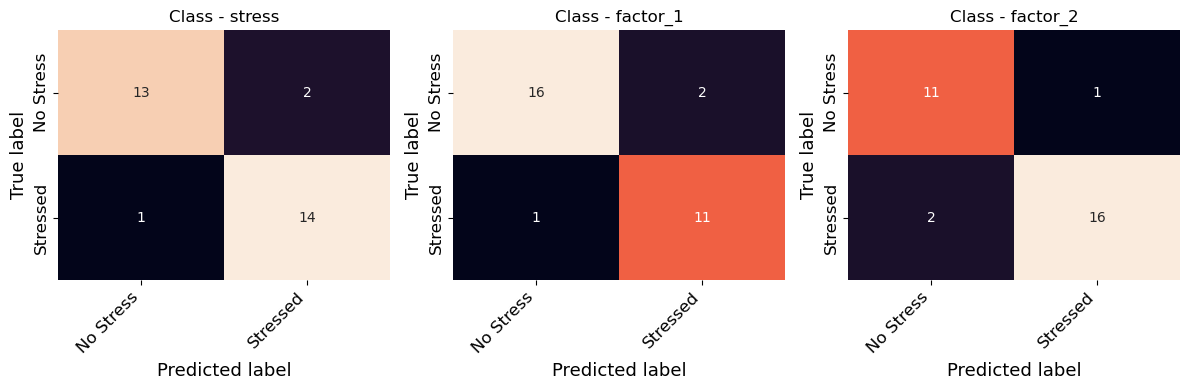

  Models  Precision    Recall  F1_Score  \
0    XGB   0.893162  0.950000  0.920234   
1     RF   0.915079  0.927778  0.920196   
2     DT   0.803148  0.937037  0.862854   
3     GB   0.870940  0.927778  0.898012   
4     CB   0.889821  0.909259  0.898490   
5    ADA   0.887443  0.912963  0.899171   

   1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?  \
0                                                                                            0.039552   
1                                                                                            0.084504   
2                                                                                            0.022228   
3                                                                                            0.011659   
4                                                                                            8.892855   
5                                                                   

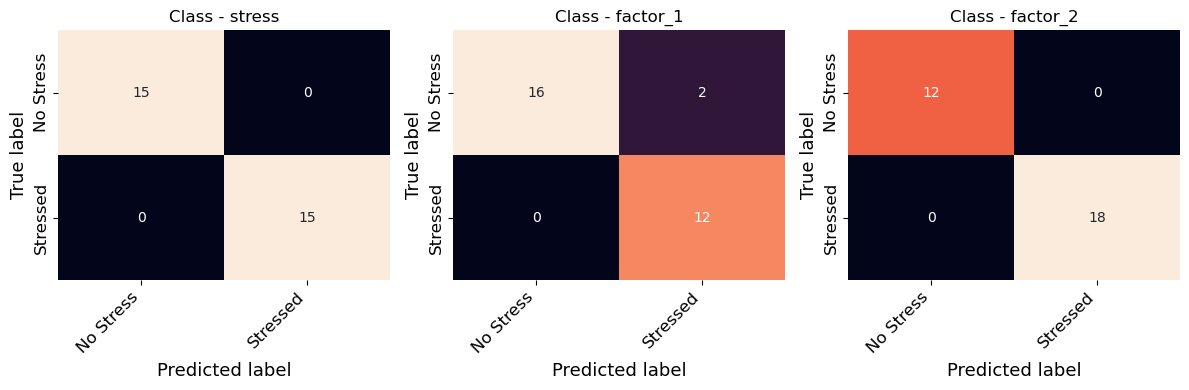


*********************************************************************************
-------------- Random Forest --------------

Precision: 0.9487
Recall: 0.9537
F1 Score: 0.9505


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.85      0.92      0.88        12
           2       1.00      0.94      0.97        18

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45
 samples avg       0.58      0.60      0.59        45





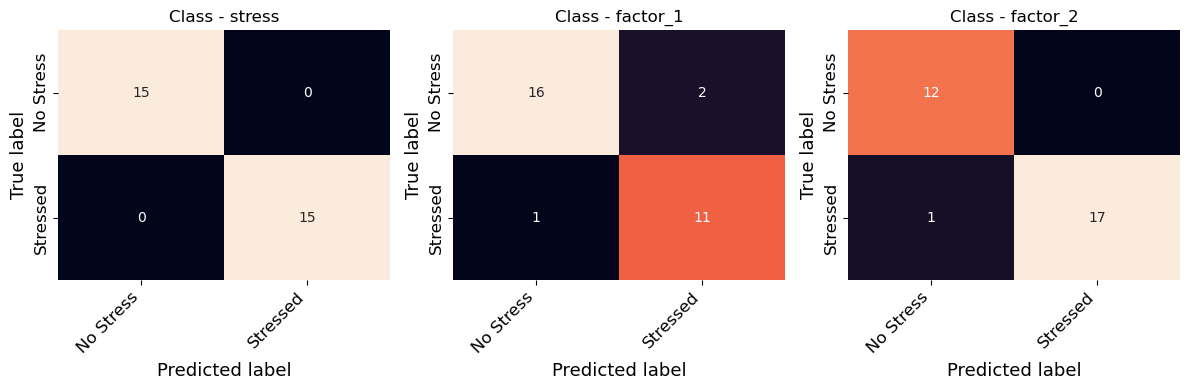


*********************************************************************************
-------------- Decision Tree --------------

Precision: 0.9154
Recall: 0.9056
F1 Score: 0.9054


              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.85      0.92      0.88        12
           2       0.90      1.00      0.95        18

   micro avg       0.91      0.91      0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45
 samples avg       0.59      0.58      0.58        45





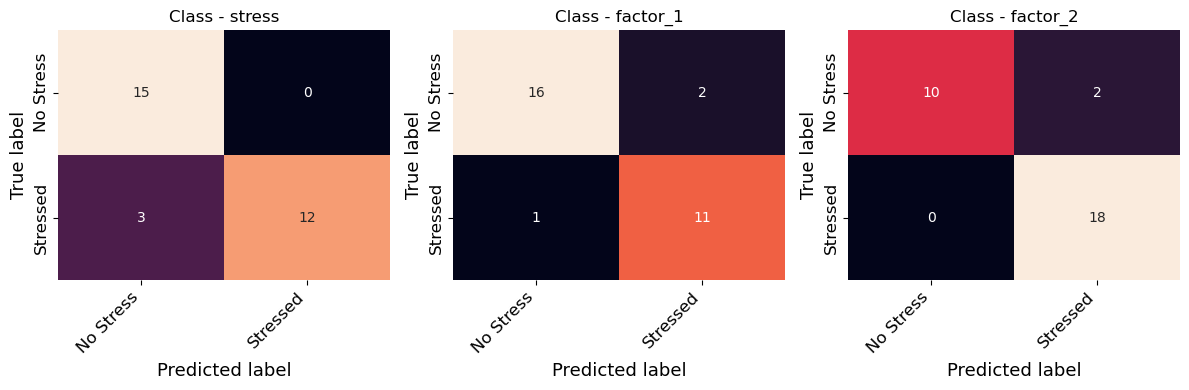


*********************************************************************************
-------------- Gradient Boosting --------------

Precision: 0.9487
Recall: 0.9537
F1 Score: 0.9505


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.85      0.92      0.88        12
           2       1.00      0.94      0.97        18

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45
 samples avg       0.58      0.60      0.59        45





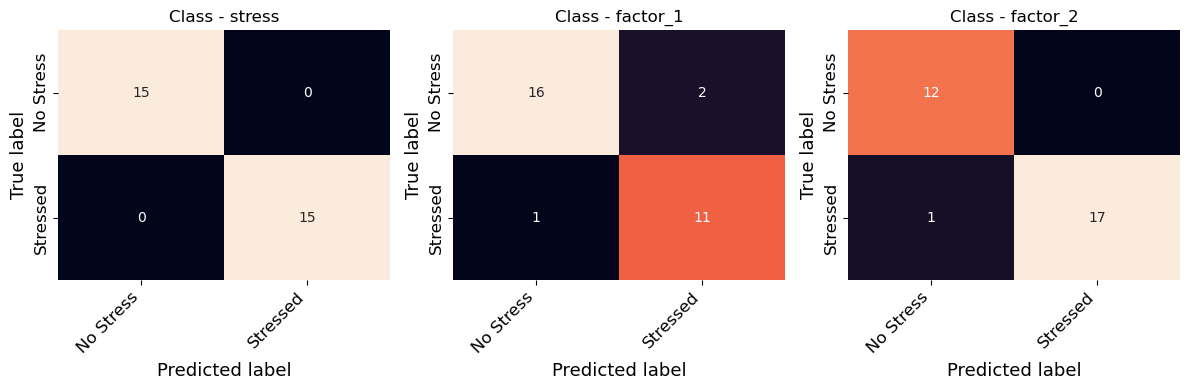


*********************************************************************************
-------------- CatBoost --------------

Precision: 0.9524
Recall: 1.0000
F1 Score: 0.9744


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        18

   micro avg       0.96      1.00      0.98        45
   macro avg       0.95      1.00      0.97        45
weighted avg       0.96      1.00      0.98        45
 samples avg       0.64      0.67      0.65        45





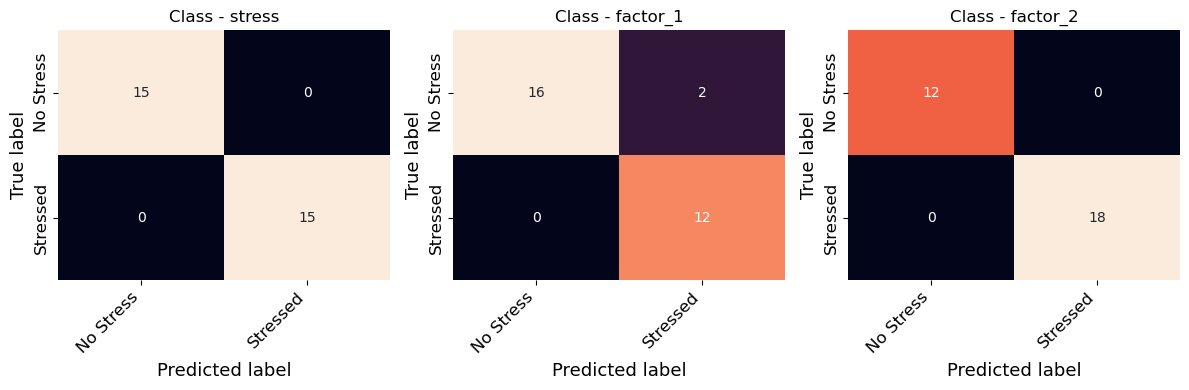


*********************************************************************************
-------------- AdaBoost --------------

Precision: 1.0000
Recall: 0.9444
F1 Score: 0.9697


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        12
           2       1.00      0.83      0.91        18

   micro avg       1.00      0.93      0.97        45
   macro avg       1.00      0.94      0.97        45
weighted avg       1.00      0.93      0.96        45
 samples avg       0.60      0.58      0.59        45





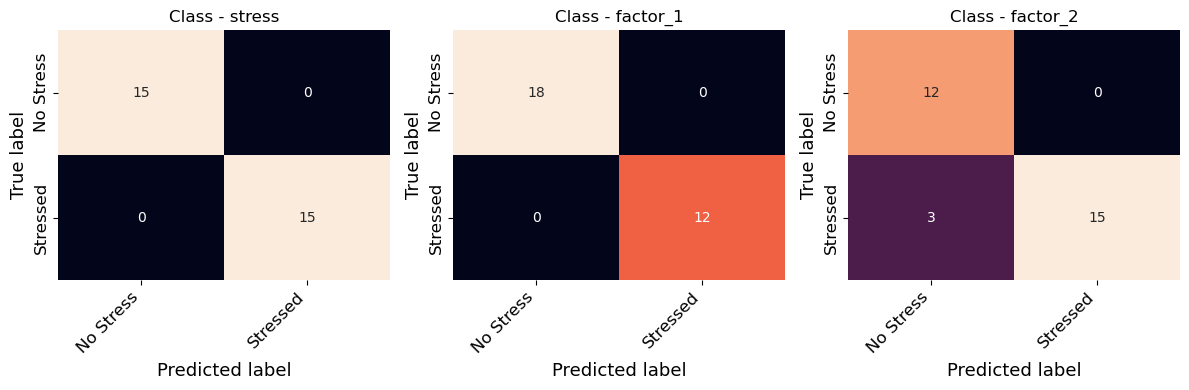

  Models  Precision    Recall  F1_Score  \
0    XGB   0.952381  1.000000  0.974359   
1     RF   0.948718  0.953704  0.950476   
2     DT   0.915385  0.905556  0.905419   
3     GB   0.948718  0.953704  0.950476   
4     CB   0.952381  1.000000  0.974359   
5    ADA   1.000000  0.944444  0.969697   

   1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?  \
0                                                                                            0.076131   
1                                                                                            0.099243   
2                                                                                            0.074095   
3                                                                                            0.041893   
4                                                                                            9.877291   
5                                                                   

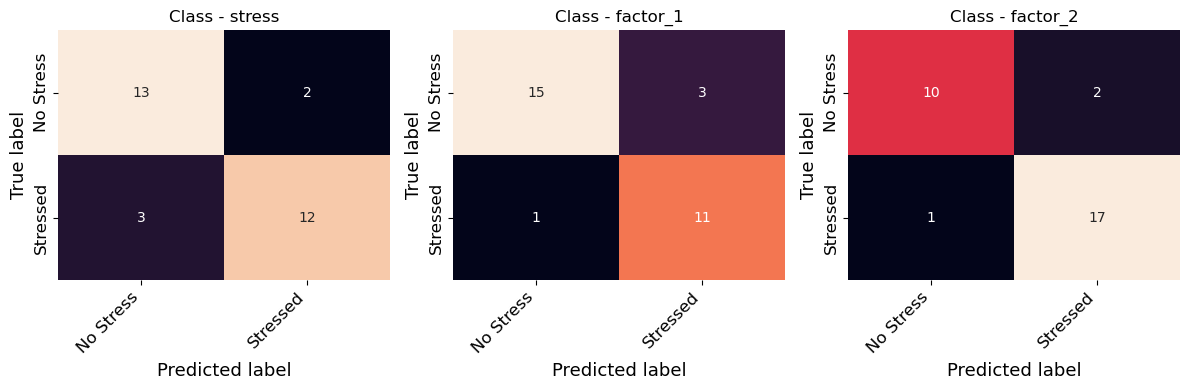


*********************************************************************************
-------------- Random Forest --------------

Precision: 0.8837
Recall: 0.8593
F1 Score: 0.8698


              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.83      0.83      0.83        12
           2       0.89      0.94      0.92        18

   micro avg       0.89      0.87      0.88        45
   macro avg       0.88      0.86      0.87        45
weighted avg       0.89      0.87      0.88        45
 samples avg       0.61      0.57      0.58        45





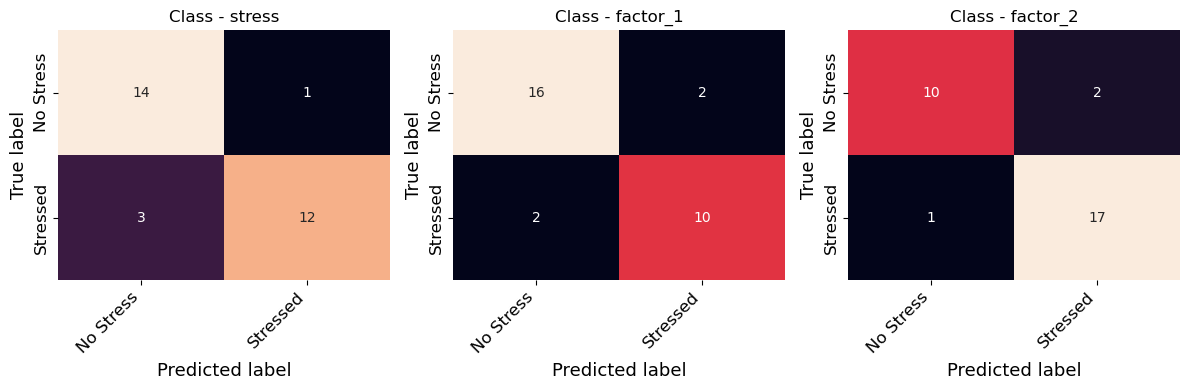


*********************************************************************************
-------------- Decision Tree --------------

Precision: 0.8697
Recall: 0.9093
F1 Score: 0.8872


              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.79      0.92      0.85        12
           2       0.89      0.94      0.92        18

   micro avg       0.87      0.91      0.89        45
   macro avg       0.87      0.91      0.89        45
weighted avg       0.88      0.91      0.89        45
 samples avg       0.61      0.59      0.60        45





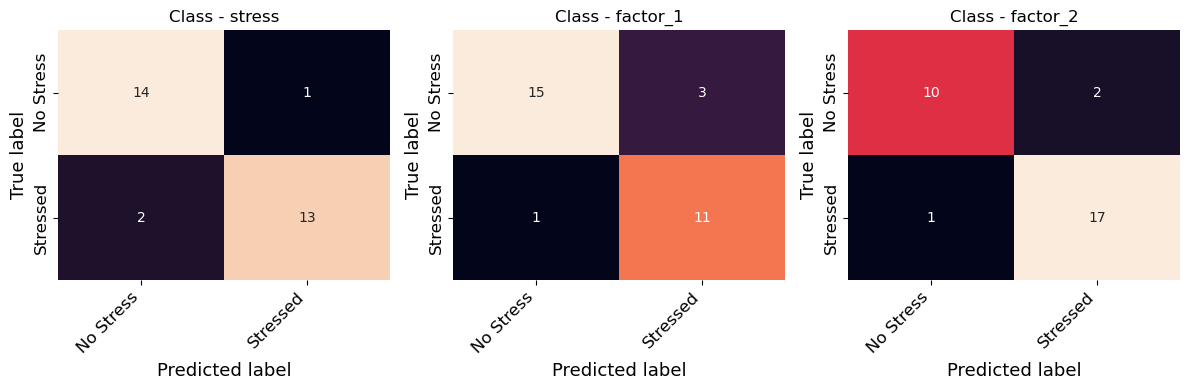


*********************************************************************************
-------------- Gradient Boosting --------------

Precision: 0.8678
Recall: 0.8870
F1 Score: 0.8741


              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.79      0.92      0.85        12
           2       0.89      0.94      0.92        18

   micro avg       0.87      0.89      0.88        45
   macro avg       0.87      0.89      0.87        45
weighted avg       0.88      0.89      0.88        45
 samples avg       0.63      0.61      0.60        45





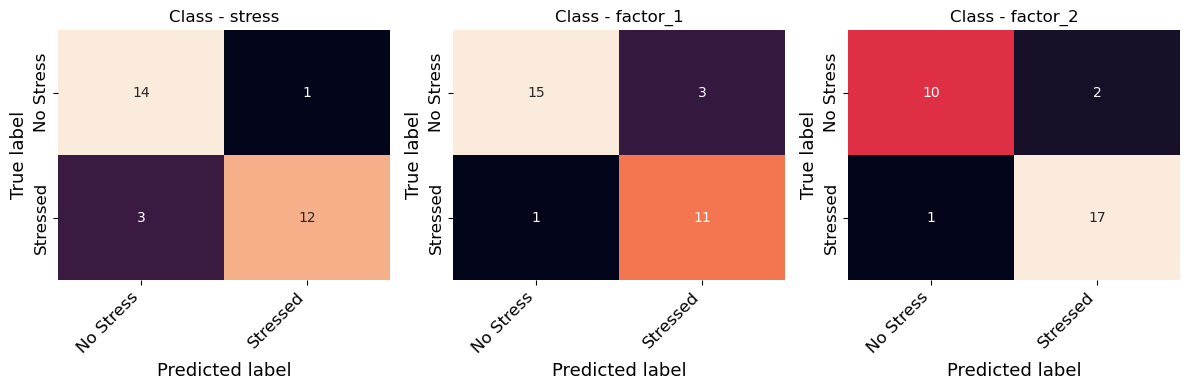


*********************************************************************************
-------------- CatBoost --------------

Precision: 0.8844
Recall: 0.8870
F1 Score: 0.8826


              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.79      0.92      0.85        12
           2       0.94      0.94      0.94        18

   micro avg       0.89      0.89      0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45
 samples avg       0.63      0.61      0.60        45





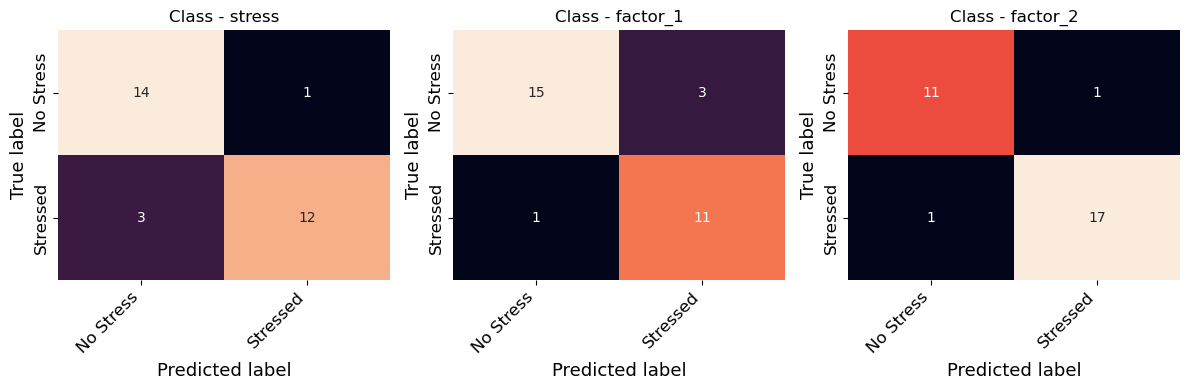


*********************************************************************************
-------------- AdaBoost --------------

Precision: 0.9115
Recall: 0.8870
F1 Score: 0.8976


              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.92      0.92      0.92        12
           2       0.89      0.94      0.92        18

   micro avg       0.91      0.89      0.90        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.89      0.90        45
 samples avg       0.63      0.61      0.60        45





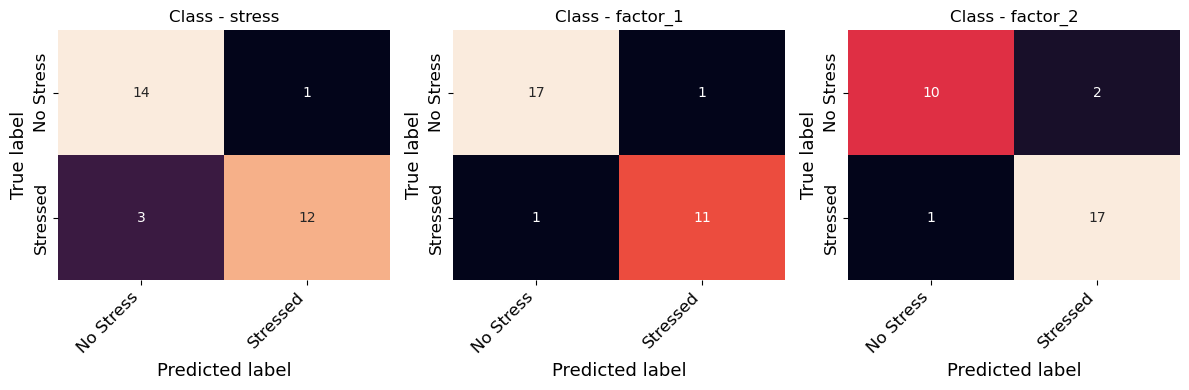

  Models  Precision    Recall  F1_Score  \
0    XGB   0.845865  0.887037  0.864220   
1     RF   0.883716  0.859259  0.869798   
2     DT   0.869674  0.909259  0.887208   
3     GB   0.867843  0.887037  0.874072   
4     CB   0.884412  0.887037  0.882580   
5    ADA   0.911493  0.887037  0.897576   

   1- Son bir ay içinde, beklenmedik bir şeylerin olması nedeniyle ne sıklıkta rahatsızlık duydunuz?  \
0                                                                                            0.052824   
1                                                                                            0.100603   
2                                                                                            0.062517   
3                                                                                            0.036558   
4                                                                                           11.122320   
5                                                                   

In [47]:
####################################################################################################
# Note: This is main function that loops over the different datasets and models.
#       It calls the exec_model function to train and evaluate the models.
#       It also saves the results to a file.
#       The results are saved in a directory called "evaluation" in the current working directory.
####################################################################################################

for state in random_states:
    
    precisions = []
    recalls = []
    accuracies = []
    f1_scores = []

    importances = pd.DataFrame(data=None, columns=X.columns)
    score_table = pd.DataFrame({"Models": ["XGB", "RF", "DT", "GB", "CB", "ADA"],
                                "Precision": np.nan,
                                "Recall": np.nan,
                                "F1_Score": np.nan})

    
    for model in models:
        print("\n*********************************************************************************" +
                "\n-------------- " + model.name + " --------------\n")
        
        importance_df, scores = exec_model(model, evaluation_dir, state, scale=False)
        precisions.append(scores[0])
        recalls.append(scores[1])
        f1_scores.append(scores[2])
        importances = pd.concat([importances, importance_df], axis=0).reset_index(drop=True)

    score_table["Precision"] = precisions
    score_table["Recall"] = recalls
    score_table["F1_Score"] = f1_scores

    score_table = pd.concat([score_table, importances], axis = 1)

    print(score_table)
    out_path = os.path.join(evaluation_dir, "evaluation" + f'_RS{state}.xlsx')
    score_table.to_excel(out_path, encoding='utf-8')
    del score_table, importances

    gc.collect()